## 6. Regularization Techniques


In [43]:
X = df_encoded.drop('median_house_value', axis=1)
y = df_encoded['median_house_value']

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [44]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_r, y_train_r)

y_pred_ridge = ridge.predict(X_test_r)


In [45]:
print("Ridge Regression MSE:", mean_squared_error(y_test_r, y_pred_ridge))
print("Ridge Regression RMSE:", np.sqrt(mean_squared_error(y_test_r, y_pred_ridge)))
print("Ridge Regression R2:", r2_score(y_test_r, y_pred_ridge))


Ridge Regression MSE: 4905952780.849355
Ridge Regression RMSE: 70042.5069571996
Ridge Regression R2: 0.6256166691230143


In [46]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_r, y_train_r)

y_pred_lasso = lasso.predict(X_test_r)


In [47]:
print("Lasso Regression MSE:", mean_squared_error(y_test_r, y_pred_lasso))
print("Lasso Regression RMSE:", np.sqrt(mean_squared_error(y_test_r, y_pred_lasso)))
print("Lasso Regression R2:", r2_score(y_test_r, y_pred_lasso))


Lasso Regression MSE: 4904419168.398324
Lasso Regression RMSE: 70031.55837476648
Lasso Regression R2: 0.625733702238362


In [48]:
reg_coeff = pd.DataFrame({
    "Feature": X.columns,
    "Ridge Coefficient": ridge.coef_,
    "Lasso Coefficient": lasso.coef_
})

reg_coeff


,Feature,Ridge Coefficient,Lasso Coefficient
0,longitude,-26860.198129,-26838.274701
1,latitude,-25493.131209,-25468.531196
2,housing_median_age,1102.629029,1102.187875
3,total_rooms,-6.019346,-6.021499
4,total_bedrooms,102.927379,102.790929
5,population,-38.177632,-38.172961
6,households,48.099003,48.251078
7,median_income,39470.951501,39473.933241
8,ocean_proximity_INLAND,-39759.650387,-39786.036027
9,ocean_proximity_ISLAND,108852.317864,135711.706102


Ridge regression reduces the magnitude of coefficients but does not eliminate
features completely. Lasso regression performs feature selection by shrinking
some coefficients to zero.


## 7. Model Diagnostics


In [49]:
residuals = y_test_m - y_pred_m


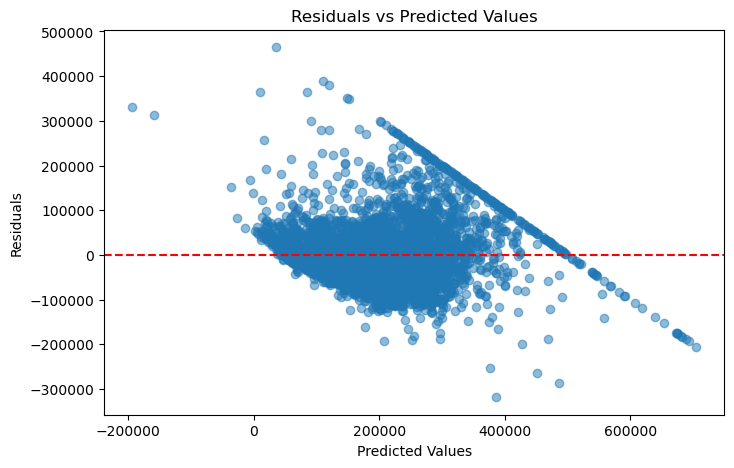

In [50]:
plt.figure(figsize=(8,5))
plt.scatter(y_pred_m, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()


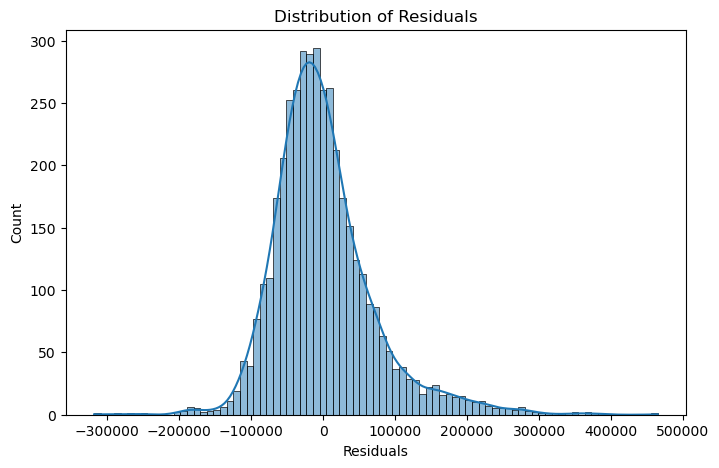

In [51]:
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()


The residuals approximately follow a normal distribution, satisfying the
normality assumption of linear regression.


## 8. Model Comparison and Results

In this section, the performance of different regression models is compared
using evaluation metrics such as MSE, RMSE, and R² score.


In [52]:
results = pd.DataFrame({
    "Model": [
        "Simple Linear Regression",
        "Multiple Linear Regression",
        "Polynomial Regression",
        "Ridge Regression",
        "Lasso Regression"
    ],
    "MSE": [
        mean_squared_error(y_test_s, y_pred_s),
        mean_squared_error(y_test_m, y_pred_m),
        mean_squared_error(y_test_p, y_pred_poly),
        mean_squared_error(y_test_r, y_pred_ridge),
        mean_squared_error(y_test_r, y_pred_lasso)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test_s, y_pred_s)),
        np.sqrt(mean_squared_error(y_test_m, y_pred_m)),
        np.sqrt(mean_squared_error(y_test_p, y_pred_poly)),
        np.sqrt(mean_squared_error(y_test_r, y_pred_ridge)),
        np.sqrt(mean_squared_error(y_test_r, y_pred_lasso))
    ],
    "R2 Score": [
        r2_score(y_test_s, y_pred_s),
        r2_score(y_test_m, y_pred_m),
        r2_score(y_test_p, y_pred_poly),
        r2_score(y_test_r, y_pred_ridge),
        r2_score(y_test_r, y_pred_lasso)
    ]
})

results


,Model,MSE,RMSE,R2 Score
0,Simple Linear Regression,7.091158e+09,84209.012414,0.458859
1,Multiple Linear Regression,4.904400e+09,70031.419920,0.625735
2,Polynomial Regression,7.032733e+09,83861.389691,0.463318
3,Ridge Regression,4.905953e+09,70042.506957,0.625617
4,Lasso Regression,4.904419e+09,70031.558375,0.625734


### Observations

- Multiple Linear Regression shows better performance than Simple Linear Regression
  as it uses multiple input features.
- Polynomial Regression captures non-linear patterns but may risk overfitting.
- Ridge Regression provides stable performance by reducing coefficient magnitudes.
- Lasso Regression performs feature selection by eliminating less important features.

Overall, Multiple Linear Regression and Ridge Regression provide the best balance
between accuracy and model stability.


### Best Model

Based on the evaluation metrics, Multiple Linear Regression is selected as the
best-performing model for this dataset due to its higher R² score and lower
prediction error.


## 9. Conclusion

This assignment presented a comprehensive study of various linear regression
models applied to a real-world housing dataset.


Exploratory Data Analysis helped in understanding the dataset structure,
feature distributions, and relationships between variables. Proper data
preprocessing, including handling missing values and encoding categorical
features, ensured the dataset was suitable for machine learning models.

Simple Linear Regression demonstrated the basic relationship between median
income and house value, while Multiple Linear Regression improved prediction
accuracy by incorporating multiple features. Polynomial Regression was used
to capture non-linear relationships, although it showed potential overfitting
at higher complexity levels.

Regularization techniques such as Ridge and Lasso regression helped in
controlling model complexity and identifying important features. Model
diagnostics confirmed that the assumptions of linear regression were reasonably
satisfied.

Overall, Multiple Linear Regression provided the best performance for this
dataset, balancing accuracy and interpretability.
